# Historical Analysis of Cumlative Heat Stress

Using multiple cities, 1979=1989:
- Chicago, Illinois (Cook County) - O'Hare International Airport
- Phoenix, Arizona (Maricopa County) - Sky Harbor International Airport
- Dallas, Texas (Dallas County) - Fort Worth International Airport
- Houston, Texas (Harris County) - George Bush Intercontinental Airport

In [1]:
import pandas as pd
import numpy as np
import datetime
import scipy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [3]:
# Import NOAA data as CSV
df_chicago = pd.read_csv('NOAA_LCD_Data/Chicago_OHare_Airport.csv', usecols= ['DATE','HourlyWetBulbTemperature', 'HourlyRelativeHumidity'])
df_phoenix = pd.read_csv('NOAA_LCD_Data/Phoenix_Sky_Airport.csv', usecols= ['DATE','HourlyWetBulbTemperature', 'HourlyRelativeHumidity'])
df_dallas = pd.read_csv('NOAA_LCD_Data/Dallas_FTW_Airport.csv', usecols= ['DATE','HourlyWetBulbTemperature', 'HourlyRelativeHumidity'])
df_houston = pd.read_csv('NOAA_LCD_Data/Houston_Bush_Airport.csv', usecols= ['DATE','HourlyWetBulbTemperature', 'HourlyRelativeHumidity'])
dfs = [df_chicago, df_phoenix, df_dallas, df_houston]

# chicago data, file content same as Chicago_OHare_Airport.csv
df = pd.read_csv('NOAA_LCD_Data/3155344_1979.csv', usecols= ['DATE','HourlyWetBulbTemperature', 'HourlyRelativeHumidity'])

In [4]:
# CDC WONDER Dataset
# E900 (Excessive heat - hyperthermia
# Centers for Disease Control and Prevention Accessed at http://wonder.cdc.gov/cmf-icd9.html

# Fill in mortality data
d = {'Year': ['1979-12-31T00:00:00', '1980-12-31T00:00:00', '1981-12-31T00:00:00', '1982-12-31T00:00:00', '1983-12-31T00:00:00', '1984-12-31T00:00:00', '1985-12-31T00:00:00', '1986-12-31T00:00:00', '1987-12-31T00:00:00', '1988-12-31T00:00:00'], 'Deaths': [1,8,1,1,10,4,2,24,5,20]}
df2 = pd.DataFrame(data=d)
df2['Cumulative Deaths']=df2['Deaths'].cumsum()

d_chicago = {'Year': ['1979-12-31T00:00:00', '1980-12-31T00:00:00', '1981-12-31T00:00:00', '1982-12-31T00:00:00', '1983-12-31T00:00:00', '1984-12-31T00:00:00', '1985-12-31T00:00:00', '1986-12-31T00:00:00', '1987-12-31T00:00:00', '1988-12-31T00:00:00'], 'Deaths': [1,8,1,1,10,4,2,24,5,20]}
df2_chicago = pd.DataFrame(data=d_chicago)
df2_chicago['Cumulative Deaths']=df2_chicago['Deaths'].cumsum()

d_phoenix = {'Year': ['1979-12-31T00:00:00', '1980-12-31T00:00:00', '1981-12-31T00:00:00', '1982-12-31T00:00:00', '1983-12-31T00:00:00', '1984-12-31T00:00:00', '1985-12-31T00:00:00', '1986-12-31T00:00:00', '1987-12-31T00:00:00', '1988-12-31T00:00:00'], 'Deaths': [9,14,11,6,10,9,4,4,5,17]}
df2_phoenix = pd.DataFrame(data=d_phoenix)
df2_phoenix['Cumulative Deaths']=df2_phoenix['Deaths'].cumsum()

d_dallas = {'Year': ['1979-12-31T00:00:00', '1980-12-31T00:00:00', '1981-12-31T00:00:00', '1982-12-31T00:00:00', '1983-12-31T00:00:00', '1984-12-31T00:00:00', '1985-12-31T00:00:00', '1986-12-31T00:00:00', '1987-12-31T00:00:00', '1988-12-31T00:00:00'], 'Deaths': [0,22,2,3,8,1,0,4,0,8]}
df2_dallas = pd.DataFrame(data=d_dallas)
df2_dallas['Cumulative Deaths']=df2_dallas['Deaths'].cumsum()

d_houston = {'Year': ['1979-12-31T00:00:00', '1980-12-31T00:00:00', '1981-12-31T00:00:00', '1982-12-31T00:00:00', '1983-12-31T00:00:00', '1984-12-31T00:00:00', '1985-12-31T00:00:00', '1986-12-31T00:00:00', '1987-12-31T00:00:00', '1988-12-31T00:00:00'], 'Deaths': [1,6,2,2,5,1,4,7,0,1]}
df2_houston = pd.DataFrame(data=d_houston)
df2_houston['Cumulative Deaths']=df2_houston['Deaths'].cumsum()

In [5]:
# Lethal Heat Stress Temperature, as defined in Wouters et al., 2022
# Inputs: Wet Bulb Temperature (C), Relative Humidity (%)
# Outputs: Lethal Heat Stress Temperature (C)
def T_s(T_w, RH):
    T_s=T_w+4.5*(1-(RH/100)**2)
    return T_s

In [6]:
# repair data by interpolating to replace NaN
df = df.interpolate()
df_chicago = df_chicago.interpolate()
df_phoenix = df_phoenix.interpolate()
df_dallas = df_dallas.interpolate()
df_houston = df_houston.interpolate()

# convert wet bulb temp from F to C
df['HourlyWetBulbTemperature_Celsius'] = df.apply(lambda x: (5/9)*(x['HourlyWetBulbTemperature']-32),axis=1)
df_chicago['HourlyWetBulbTemperature_Celsius'] = df_chicago.apply(lambda x: (5/9)*(x['HourlyWetBulbTemperature']-32),axis=1)
df_phoenix['HourlyWetBulbTemperature_Celsius'] = df_phoenix.apply(lambda x: (5/9)*(x['HourlyWetBulbTemperature']-32),axis=1)
df_dallas['HourlyWetBulbTemperature_Celsius'] = df_dallas.apply(lambda x: (5/9)*(x['HourlyWetBulbTemperature']-32),axis=1)
df_houston['HourlyWetBulbTemperature_Celsius'] = df_houston.apply(lambda x: (5/9)*(x['HourlyWetBulbTemperature']-32),axis=1)

# calculate Lethal Heat Stress Temperature 
df['HourlyLethalHeatStressTemp'] = df.apply(lambda T_s: T_s['HourlyWetBulbTemperature_Celsius']+4.5*(1-(T_s['HourlyRelativeHumidity']/100)**2),axis=1)
df_chicago['HourlyLethalHeatStressTemp'] = df_chicago.apply(lambda T_s: T_s['HourlyWetBulbTemperature_Celsius']+4.5*(1-(T_s['HourlyRelativeHumidity']/100)**2),axis=1)
df_phoenix['HourlyLethalHeatStressTemp'] = df_phoenix.apply(lambda T_s: T_s['HourlyWetBulbTemperature_Celsius']+4.5*(1-(T_s['HourlyRelativeHumidity']/100)**2),axis=1)
df_dallas['HourlyLethalHeatStressTemp'] = df_dallas.apply(lambda T_s: T_s['HourlyWetBulbTemperature_Celsius']+4.5*(1-(T_s['HourlyRelativeHumidity']/100)**2),axis=1)
df_houston['HourlyLethalHeatStressTemp'] = df_houston.apply(lambda T_s: T_s['HourlyWetBulbTemperature_Celsius']+4.5*(1-(T_s['HourlyRelativeHumidity']/100)**2),axis=1)

In [7]:
alpha = 1.5

# get region in Blue (between Lethal and Deadly thresholds)
def Blue(T_s):
    if T_s >= 27:
        return 8
    elif T_s >= 19:
        return T_s-19
    else:
        return 0

# get region in Red (above Deadly threshold)
def Red(T_s):
    if T_s >= 27:
        return T_s-27
    else:
        return 0

In [8]:
# Calculate the Culmulative Lethal Heat Stress Index
df['HourlyIndex'] = df['HourlyLethalHeatStressTemp'].apply(Blue) + alpha * df['HourlyLethalHeatStressTemp'].apply(Red)
df['CulmulativeLethalHeatStressIndex'] = df['HourlyIndex'].cumsum()
dfs = [df_chicago, df_phoenix, df_dallas, df_houston]

for i in dfs:
    i['HourlyIndex'] = i['HourlyLethalHeatStressTemp'].apply(Blue) + alpha * i['HourlyLethalHeatStressTemp'].apply(Red)
    i['CulmulativeLethalHeatStressIndex'] = i['HourlyIndex'].cumsum()

In [9]:
# add year/month tags (might not be needed in the end)
df['YEAR']=pd.to_datetime(df['DATE']).dt.year
df['MONTH']=pd.to_datetime(df['DATE']).dt.month
df

,DATE,HourlyRelativeHumidity,HourlyWetBulbTemperature,HourlyWetBulbTemperature_Celsius,HourlyLethalHeatStressTemp,HourlyIndex,CulmulativeLethalHeatStressIndex,YEAR,MONTH
0,1979-01-01T00:00:00,85.0,22.0,-5.555556,-4.306806,0.0,0.000000,1979,1
1,1979-01-01T01:00:00,81.0,21.0,-6.111111,-4.563561,0.0,0.000000,1979,1
2,1979-01-01T02:00:00,82.0,20.0,-6.666667,-5.192467,0.0,0.000000,1979,1
3,1979-01-01T03:00:00,81.0,20.0,-6.666667,-5.119117,0.0,0.000000,1979,1
4,1979-01-01T04:00:00,89.0,19.0,-7.222222,-6.286672,0.0,0.000000,1979,1
...,...,...,...,...,...,...,...,...,...
93034,1988-12-31T15:21:00,73.0,32.5,0.277778,2.379728,0.0,71434.886813,1988,12
93035,1988-12-31T16:00:00,76.0,32.0,0.000000,1.900800,0.0,71434.886813,1988,12
93036,1988-12-31T17:00:00,82.0,31.0,-0.555556,0.918644,0.0,71434.886813,1988,12
93037,1988-12-31T17:14:00,82.0,31.0,-0.555556,0.918644,0.0,71434.886813,1988,12


/Users/waltershen/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/waltershen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/waltershen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


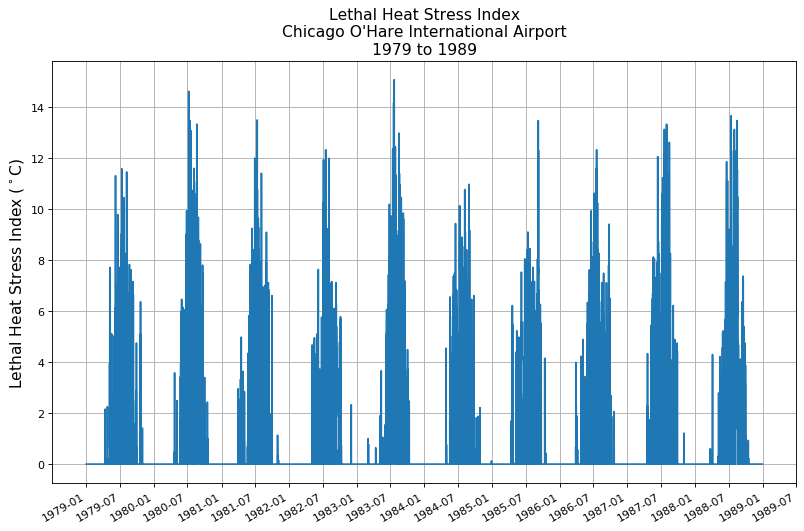

In [10]:
fig = plt.figure(figsize=(12, 7), dpi=80)
ax1 = fig.add_subplot(111)
lines = ax1.plot(pd.to_datetime(df['DATE']),df['HourlyIndex'])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
for label in ax1.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax1.grid(True)

ax1.set_ylabel("Lethal Heat Stress Index (${^\circ}$C)",color="black",fontsize=14)
ax1.set_title("Lethal Heat Stress Index\nChicago O'Hare International Airport\n1979 to 1989",color="black",fontsize=14)

# save the plot as a file
fig.savefig('Chicago_LHSI.png',
            format='png',
            dpi=100,
            bbox_inches='tight')

/Users/waltershen/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/waltershen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/waltershen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


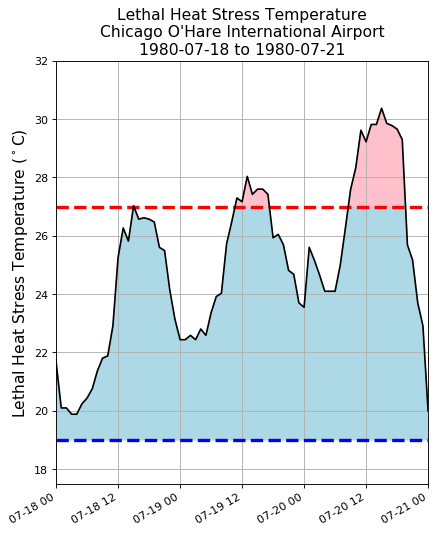

In [11]:
# date tick labels code https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html#sphx-glr-gallery-text-labels-and-annotations-date-py

fig = plt.figure(figsize=(6, 7), dpi=80)
ax1 = fig.add_subplot(111)
plt.fill_between(pd.to_datetime(df['DATE']),df['HourlyLethalHeatStressTemp'], 19,
                 where = (df['HourlyLethalHeatStressTemp'] > 19),
                 color = 'lightblue')
plt.fill_between(pd.to_datetime(df['DATE']),df['HourlyLethalHeatStressTemp'], 27,
                 where = (df['HourlyLethalHeatStressTemp'] > 27),
                 color = 'pink')
plt.axhline(19,linewidth=3,linestyle = 'dashed',color = 'blue')
plt.axhline(27,linewidth=3,linestyle = 'dashed',color = 'red')
lines = ax1.plot(pd.to_datetime(df['DATE']),df['HourlyLethalHeatStressTemp'],color="black")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
for label in ax1.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax1.set_ylabel("Lethal Heat Stress Temperature (${^\circ}$C)",color="black",fontsize=14)
ax1.grid(True)

ax1.set_xlim([datetime.date(1980, 7, 18), datetime.date(1980, 7, 21)])
ax1.set_ylim([17.5, 32])

ax1.set_title("Lethal Heat Stress Temperature\nChicago O'Hare International Airport\n1980-07-18 to 1980-07-21",color="black",fontsize=14)

# save the plot as a file
fig.savefig('Chicago_diagram.png',
            format='png',
            dpi=100,
            bbox_inches='tight')

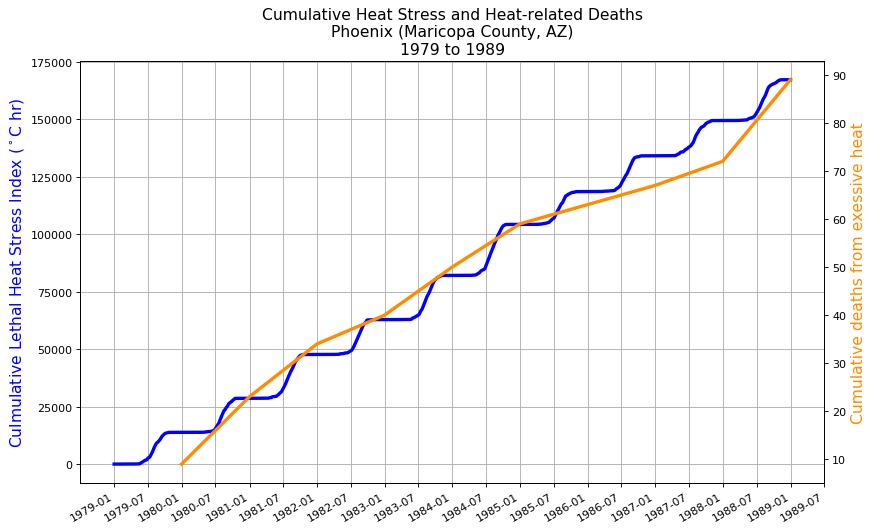

In [12]:
# date tick labels code https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html#sphx-glr-gallery-text-labels-and-annotations-date-py

fig = plt.figure(figsize=(12, 7), dpi=80)
ax1 = fig.add_subplot(111)
lines = ax1.plot(pd.to_datetime(df_phoenix['DATE']),df_phoenix['CulmulativeLethalHeatStressIndex'],color="blue",linewidth=3)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
for label in ax1.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax1.set_ylabel("Culmulative Lethal Heat Stress Index (${^\circ}$C hr)",color="blue",fontsize=14)
ax1.grid(True)

# twin object for two different y-axis on the sample plot
ax2=ax1.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(pd.to_datetime(df2_phoenix['Year']),df2_phoenix['Cumulative Deaths'],color="darkorange",linewidth=3)
ax2.set_ylabel("Cumulative deaths from exessive heat",color="darkorange",fontsize=14)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))

ax1.set_title("Cumulative Heat Stress and Heat-related Deaths\nPhoenix (Maricopa County, AZ)\n1979 to 1989",color="black",fontsize=14)

# save the plot as a file
fig.savefig('Phoenix.png',
            format='png',
            dpi=100,
            bbox_inches='tight')

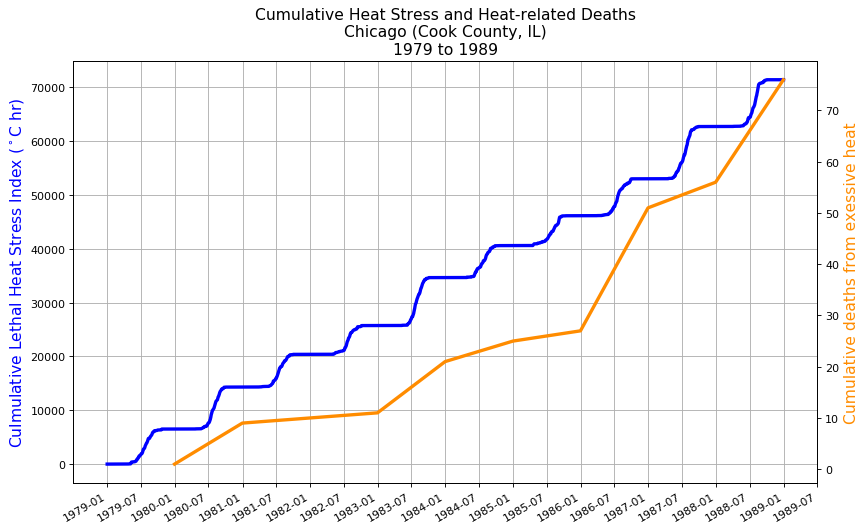

In [13]:
# date tick labels code https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html#sphx-glr-gallery-text-labels-and-annotations-date-py

fig = plt.figure(figsize=(12, 7), dpi=80)
ax1 = fig.add_subplot(111)
lines = ax1.plot(pd.to_datetime(df['DATE']),df['CulmulativeLethalHeatStressIndex'],color="blue",linewidth=3)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
for label in ax1.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax1.set_ylabel("Culmulative Lethal Heat Stress Index (${^\circ}$C hr)",color="blue",fontsize=14)
ax1.grid(True)

# twin object for two different y-axis on the sample plot
ax2=ax1.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(pd.to_datetime(df2['Year']),df2['Cumulative Deaths'],color="darkorange",linewidth=3)
ax2.set_ylabel("Cumulative deaths from exessive heat",color="darkorange",fontsize=14)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))

ax1.set_title("Cumulative Heat Stress and Heat-related Deaths\nChicago (Cook County, IL)\n1979 to 1989",color="black",fontsize=14)

# save the plot as a file
fig.savefig('Chicago.png',
            format='png',
            dpi=100,
            bbox_inches='tight')

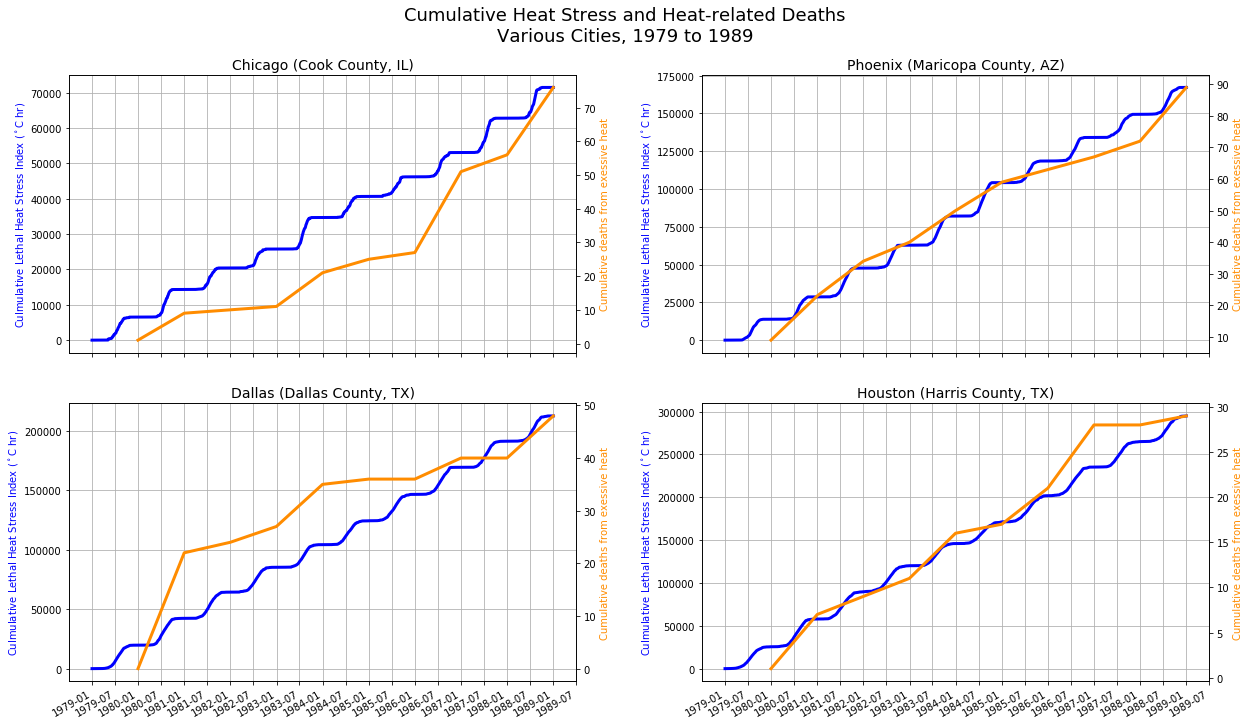

In [14]:
fig, axs = plt.subplots(2, 2,figsize=(18,10),sharex=True)

## Plot Chicago
lines = axs[0, 0].plot(pd.to_datetime(df['DATE']),df['CulmulativeLethalHeatStressIndex'],color="blue",linewidth=3)
axs[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axs[0, 0].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
for label in axs[0, 0].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
axs[0, 0].set_ylabel("Culmulative Lethal Heat Stress Index (${^\circ}$C hr)",color="blue")
axs[0, 0].grid(True)
# twin object for two different y-axis on the sample plot
ax2=axs[0, 0].twinx()
# make a plot with different y-axis using second axis object
ax2.plot(pd.to_datetime(df2['Year']),df2['Cumulative Deaths'],color="darkorange",linewidth=3)
ax2.set_ylabel("Cumulative deaths from exessive heat",color="darkorange")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
axs[0, 0].set_title("Chicago (Cook County, IL)",color="black",fontsize=14)

## Plot Phoenix
lines = axs[0, 1].plot(pd.to_datetime(df_phoenix['DATE']),df_phoenix['CulmulativeLethalHeatStressIndex'],color="blue",linewidth=3)
axs[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axs[0, 1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
for label in axs[0, 1].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
axs[0, 1].set_ylabel("Culmulative Lethal Heat Stress Index (${^\circ}$C hr)",color="blue")
axs[0, 1].grid(True)
# twin object for two different y-axis on the sample plot
ax2=axs[0, 1].twinx()
# make a plot with different y-axis using second axis object
ax2.plot(pd.to_datetime(df2_phoenix['Year']),df2_phoenix['Cumulative Deaths'],color="darkorange",linewidth=3)
ax2.set_ylabel("Cumulative deaths from exessive heat",color="darkorange")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
axs[0, 1].set_title("Phoenix (Maricopa County, AZ)",color="black",fontsize=14)

## Plot Dallas
lines = axs[1, 0].plot(pd.to_datetime(df_dallas['DATE']),df_dallas['CulmulativeLethalHeatStressIndex'],color="blue",linewidth=3)
axs[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axs[1, 0].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
for label in axs[1, 0].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
axs[1, 0].set_ylabel("Culmulative Lethal Heat Stress Index (${^\circ}$C hr)",color="blue")
axs[1, 0].grid(True)
# twin object for two different y-axis on the sample plot
ax2=axs[1, 0].twinx()
# make a plot with different y-axis using second axis object
ax2.plot(pd.to_datetime(df2_dallas['Year']),df2_dallas['Cumulative Deaths'],color="darkorange",linewidth=3)
ax2.set_ylabel("Cumulative deaths from exessive heat",color="darkorange")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
axs[1, 0].set_title("Dallas (Dallas County, TX)",color="black",fontsize=14)

## Plot Houston
lines = axs[1, 1].plot(pd.to_datetime(df_houston['DATE']),df_houston['CulmulativeLethalHeatStressIndex'],color="blue",linewidth=3)
axs[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axs[1, 1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
for label in axs[1, 1].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
axs[1, 1].set_ylabel("Culmulative Lethal Heat Stress Index (${^\circ}$C hr)",color="blue")
axs[1, 1].grid(True)
# twin object for two different y-axis on the sample plot
ax2=axs[1, 1].twinx()
# make a plot with different y-axis using second axis object
ax2.plot(pd.to_datetime(df2_houston['Year']),df2_houston['Cumulative Deaths'],color="darkorange",linewidth=3)
ax2.set_ylabel("Cumulative deaths from exessive heat",color="darkorange")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
axs[1, 1].set_title("Houston (Harris County, TX)",color="black",fontsize=14)

fig.tight_layout(pad=3)
fig.suptitle('Cumulative Heat Stress and Heat-related Deaths\nVarious Cities, 1979 to 1989',color="black",fontsize=18, y=1.03)

# save the plot as a file
fig.savefig('historical_data_Cities.png',
            format='png',
            dpi=100,
            bbox_inches='tight')

In [15]:
print("IHS, Chicago, 1979-1989:",df_chicago['CulmulativeLethalHeatStressIndex'].iloc[-1])
print("IHS, Phoenix, 1979-1989:",df_phoenix['CulmulativeLethalHeatStressIndex'].iloc[-1])
print("IHS, Dallas, 1979-1989:",df_dallas['CulmulativeLethalHeatStressIndex'].iloc[-1])
print("IHS, Houston, 1979-1989:",df_houston['CulmulativeLethalHeatStressIndex'].iloc[-1])

IHS, Chicago, 1979-1989: 71434.88681318186
IHS, Phoenix, 1979-1989: 167187.62549653475
IHS, Dallas, 1979-1989: 212641.49372292135
IHS, Houston, 1979-1989: 294881.0178105457


In [16]:
# Calculate the ratio of blue to red area
df_blue = df['HourlyLethalHeatStressTemp'].apply(Blue).cumsum().iloc[-1]
df_red = df['HourlyLethalHeatStressTemp'].apply(Red).cumsum().iloc[-1]

alpha*df_red/df_blue

0.03441789588374714